In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process


In [2]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 1
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'

In [3]:
df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Getting data from file 'data_set_1.csv' for score 'd1'.

df.head():
   data_date security_id      d1
3 2010-01-04     1178501     NaN
4 2010-01-04     1323901 -0.9449
5 2010-01-04     1384501     NaN
6 2010-01-04     1536201     NaN
7 2010-01-04     1604101 -9.4220.

df.tail():
        data_date security_id      d1
127261 2017-12-26     3538501 -23.224
127262 2017-12-26     4943501  -9.938
127263 2017-12-27  1117183801   0.312
127264 2017-12-28      647001  -0.050
127265 2017-12-29     2968101   0.894.

getting df shape of (127266, 3).

No duplicates key pairs confirmed.

shape of df (127266, 3).

data_date      datetime64[ns]
security_id            object
d1                    float64
dtype: object


In [4]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

In [5]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

data_date         0
security_id       0
d1             4788
dtype: int64
data_date         0
security_id       0
d1             4832
dtype: int64


In [6]:
df.groupby(dtcol).apply(lambda x: pd.Series([x[scorecol].isnull().sum(), x[scorecol].notnull().sum()]))

0   1
data_date         
2010-01-04  11  19
2010-01-05   0   2
2010-01-06   0   7
2010-01-07   0  18
2010-01-08   2  19
...         ..  ..
2017-12-22   0  15
2017-12-26   0   3
2017-12-27   0   1
2017-12-28   0   1
2017-12-29   0   1

[1992 rows x 2 columns]

In [7]:
print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

 Dropping all NaNs
                 d1
count  1.224340e+05
mean   2.465707e+03
std    1.435820e+05
min   -1.470070e+07
25%   -5.029875e+00
50%    3.742350e+00
75%    4.002825e+01
max    1.001120e+07


<AxesSubplot:>

In [8]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

Loading the generated research universe


In [9]:
print("Merging the dataset with research universe")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')

Merging the dataset with research universe


In [10]:
print("Counting NaNs for each column\n", data.isnull().sum())

Counting NaNs for each column
 data_date      0
security_id    0
d1             0
dtype: int64


In [11]:
data.tail()

data_date security_id       d1
83647 2017-12-22     5464701   98.300
83648 2017-12-22      597001   13.309
83649 2017-12-22       78001    1.000
83650 2017-12-22     8386601  872.486
83651 2017-12-26     3538501  -23.224

<AxesSubplot:title={'center':'Daily d1 #stocks falling into the trading universe'}, xlabel='data_date'>

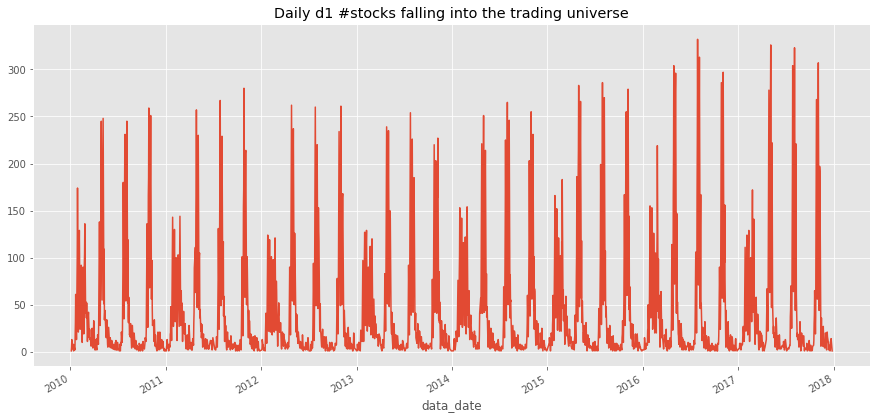

In [12]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [ ]:
data.to_csv(os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz'), index=False, compression='gzip')